# Growing Degree Days

* Este notebook carrega dados de temperatura salvos em um arquivo CSV e os analisa. 
* Ele plota as temperaturas, mostra o valor mais alto e mais baixo para cada dia e calcula o GDD.

Para usar esse notebook:

* Copie o arquivo `temperature.csv` para a mesma pasta deste notebook
* Execute todas as células usando o **▶︎ Run** butão. Isto executará a célula selecionada e seguirá para a próxima

Na célula abaixo, atribua a `base_temperature` a temperatura base da planta.

In [1]:
base_temperature = 10

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the temperature CSV file
df = pd.read_csv('temperature.csv')

A temperatura agora pode ser plotada em um gráfico.

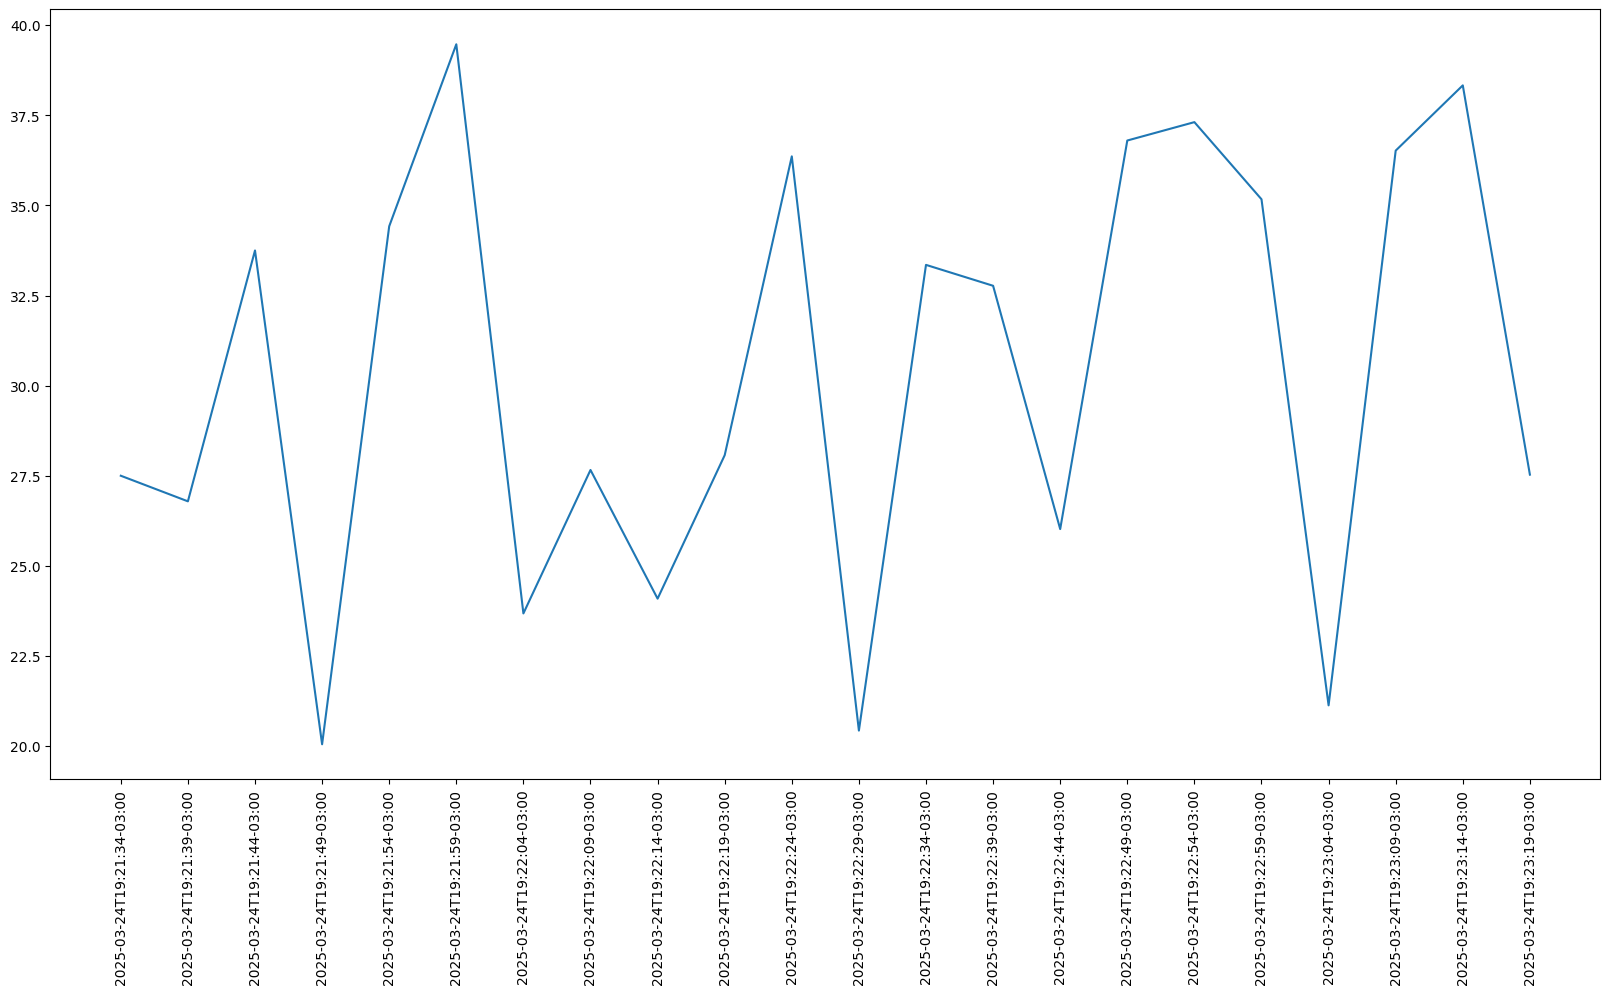

In [3]:
plt.figure(figsize=(20, 10))
plt.plot(df['date'], df['temperature'])
plt.xticks(rotation='vertical');

Depois que os dados forem lidos, eles podem ser agrupados pela coluna de `data` e as temperaturas mínima e máxima extraídas para cada data.

In [4]:
# Convert datetimes to pure dates so we can group by the date
df['date'] = pd.to_datetime(df['date']).dt.date

# Group the data by date so it can be analyzed by date
data_by_date = df.groupby('date')

# Get the minimum and maximum temperatures for each date
min_by_date = data_by_date.min()
max_by_date = data_by_date.max()

# Join the min and max temperatures into one dataframe and flatten it
min_max_by_date = min_by_date.join(max_by_date, on='date', lsuffix='_min', rsuffix='_max')
min_max_by_date = min_max_by_date.reset_index()

O GDD pode ser calculado usando a equação GDD padrão

In [5]:
def calculate_gdd(row):
    return ((row['temperature_max'] + row['temperature_min']) / 2) - base_temperature

# Calculate the GDD for each row
min_max_by_date['gdd'] = min_max_by_date.apply (lambda row: calculate_gdd(row), axis=1)

# Print the results
print(min_max_by_date[['date', 'gdd']].to_string(index=False))

      date   gdd
2025-03-24 19.76


## Rubric

| Criteria | Exemplary | Adequate | Needs Improvement |
| -------- | --------- | -------- | ----------------- |
| Capture data | Capture at least 2 complete days of data | Capture at least 1 complete day of data | Capture some data |
| Calculate GDD | Successfully run the notebook and calculate GDD | Successfully run the notebook | Not able to run the notebook |